# Statistical Investigation into The Titanic Survival Prediction.

## Who would've survived the titanic?

**This is my first project on Kaggle. I will be using Statistical techniques and Python libraries to predict the Survival rate, accurately and precisely, using Machine Learning Models. The project is constructed to be concise, systematic and informative. I've used the Comparative Method (i.e., using Scientific methodologies to investigate the similarities/differences between my project and other projects).**


![img.jpeg](https://i.ibb.co/HXd4Nq1/Whats-App-Image-2022-08-27-at-4-01-43-PM.jpg)

# Methodologies used:
> 1. Comparative Method: I compared my Project to different Projects that used the same datasets.
> 2. Crticial Method: I've created my Project based on evaluations and examinations of the given datasets.
> 3. Descriptive Method: Each code is accompanied with a specific question and/or an answer, either given as a code, comment or a text.



# 1. Introduction

Using data provided by www.kaggle.com, our goal is to
apply machine-learning techniques to successfully predict
which passengers survived the sinking of the Titanic.
Features like ticket price, age, sex, and class will be used
to make the predictions.
We take several approaches to this problem in order to
compare and contrast the different machine learning
techniques. By looking at the results of each technique we
can make some insights about the problem. The methods
used in the project include Naïve Bayes, SVM, LogisticRegression, Decision Tree, GaussianNB, Catboost, GaussianNB, Gradient Boosting, KNN, SGD, Linear Regression. Using these methods, we try to predict the
survival of passengers using different combinations of
features.
The challenge boils down to a classification problem
given a set of features. One way to make predictions
would be to use Naïve Bayes. Another would be to use
SVM to map our features to a higher dimensional space.
Our approach will be to first use Naïve Bayes as a baseline
measure of what is achievable. Once this is complete, we
use Decision Tree Classifier on our data to see if we can achieve better
results. Lastly we use Catboost analysis and find
the optimal decision boundaries.

# 2. Data Set
The data we used for our project was provided on the
Kaggle website. We were given 891 passenger samples for
our training set and their associated labels of whether or
not the passenger survived. For each passenger, we were
given his/her passenger class, name, sex, age, number of
siblings/spouses aboard, number of parents/children
aboard, ticket number, fare, cabin embarked, and port of
embarkation. For the test data, we had 418 samples in the
same format.
The dataset is not complete, meaning that for several
samples, one or many of fields were not available and
marked empty (especially in the latter fields – age, fare,
cabin, and port). However, all sample points contained at
least information about gender and passenger class. To
normalize the data, we replace missing values with the
mean of the remaining data set or other values.

![img.jpg](https://i.ibb.co/thZVNxy/Hierarchy.jpg)

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install Bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

# Reading the first observations of:
> 1. Train dataset.
> 2. Test dataset.
> 3. Gender submission dataset. 


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.shape

(891, 12)

In [10]:
test.shape

(418, 11)

In [11]:
gender_submission.shape

(418, 2)

# *A concise summary of the dataset in different ways.*

---


*https://www.w3resource.com/pandas/dataframe/dataframe-info.php*

In [12]:
import io
buffer = io.StringIO()
train.info(buf=buffer)
s = buffer.getvalue()
with open("train.txt", "w",
          encoding="utf-8") as f:  # doctest: +SKIP
     f.write(s)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 12 entries, PassengerId to Embarked
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Describing the Dataset in different ways**

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
train.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.describe(include=[np.float])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [19]:
train.describe(include=[np.int])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train.describe(include = [np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [21]:
train.describe([.25])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train.describe([.25, 0.5])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train.describe([.25, 0.5, 0.75])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train.describe().mean()

PassengerId    478.044230
Survived       111.733804
Pclass         113.268089
Age            115.596327
SibSp          112.703219
Parch          112.273456
Fare           192.323930
dtype: float64

In [25]:
train.describe().std

<bound method NDFrame._add_numeric_operations.<locals>.std of        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  >

In [26]:
train.describe().value_counts()

PassengerId  Survived    Pclass      Age         SibSp       Parch       Fare      
1.000000     0.000000    1.000000    0.420000    0.000000    0.000000    0.000000      1
223.500000   0.000000    2.000000    20.125000   0.000000    0.000000    7.910400      1
257.353842   0.486592    0.836071    14.526497   1.102743    0.806057    49.693429     1
446.000000   0.000000    3.000000    28.000000   0.000000    0.000000    14.454200     1
             0.383838    2.308642    29.699118   0.523008    0.381594    32.204208     1
668.500000   1.000000    3.000000    38.000000   1.000000    0.000000    31.000000     1
891.000000   1.000000    3.000000    80.000000   8.000000    6.000000    512.329200    1
             891.000000  891.000000  714.000000  891.000000  891.000000  891.000000    1
dtype: int64

## **Viewing The Null/NaN Data in our Dataset.**


In [27]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) * 100)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
Total,687.000000,177.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percent,77.104377,19.865320,0.224467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


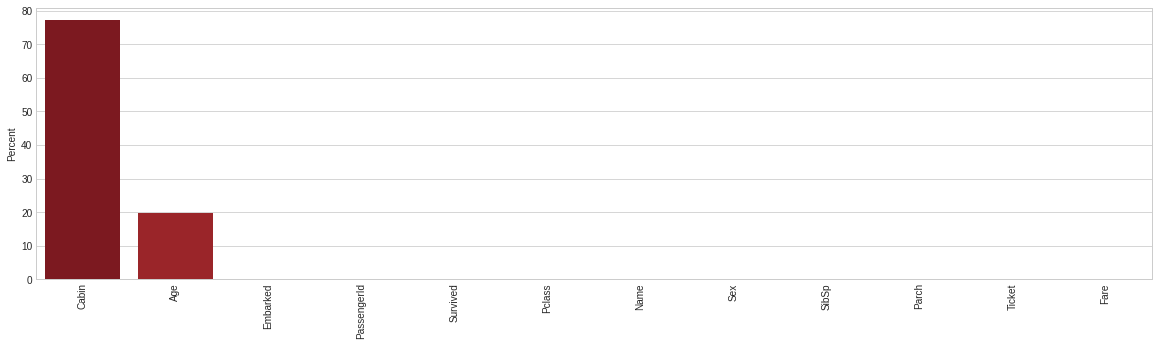

In [28]:
missing = missing_percentage(train)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

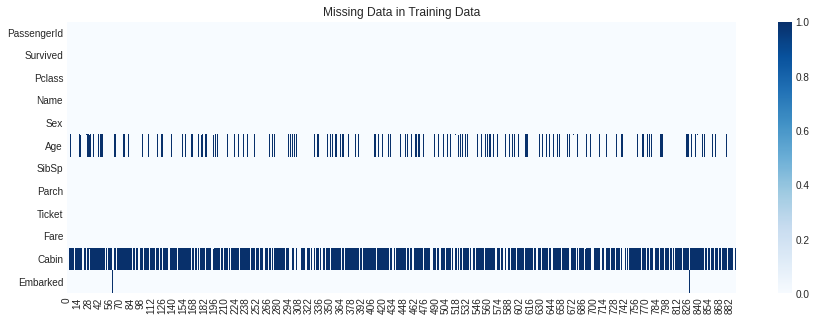

In [29]:
plt.subplots(figsize=(15,5))  
sns.heatmap(train.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in Training Data")
plt.show()

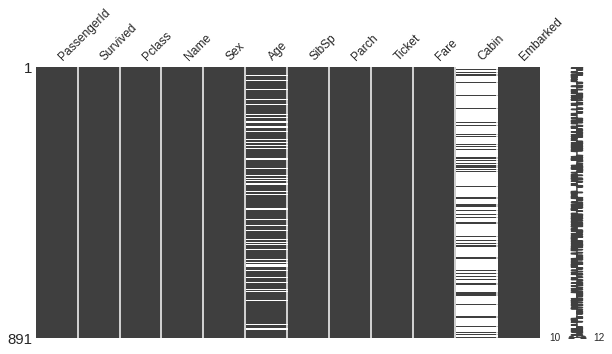

In [30]:
msno.matrix(train, figsize=(10,5), fontsize=12)

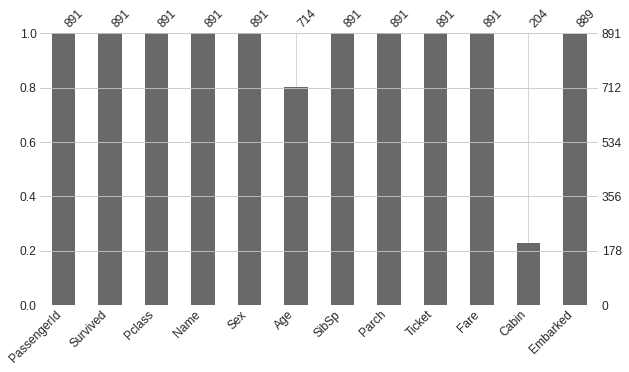

In [31]:
msno.bar(train, figsize=(10,5), fontsize=12)

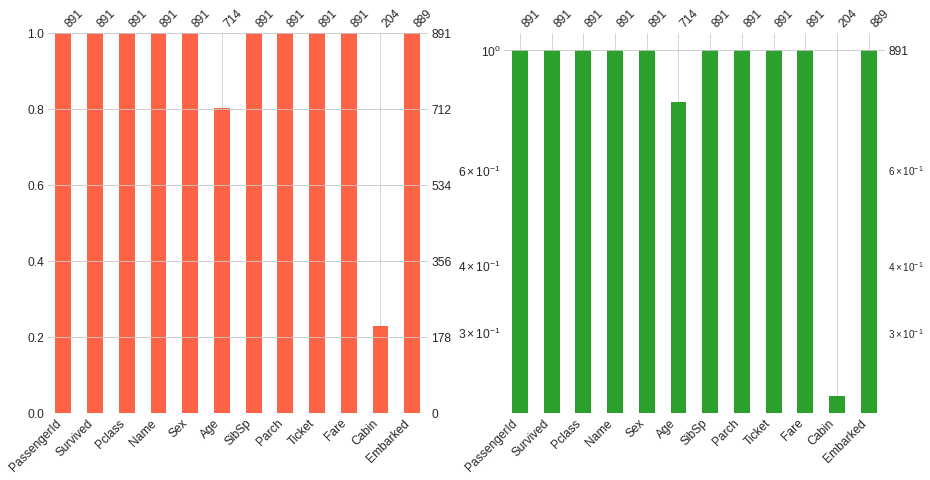

In [ ]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
msno.bar(train, color="tomato", fontsize=12, ax=ax1);

ax2 = fig.add_subplot(1,2,2)
msno.bar(train, log=True, color="tab:green", fontsize=12, ax=ax2);

In [ ]:
# Determine the null values:
trainNullVals = train.isnull().sum().to_frame()
trainNullVals

,Null
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.438799
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
train.isnull().sum().sum()

866

In [ ]:
trainNullVals = pd.DataFrame(train.isnull().sum())
trainNullVals = trainNullVals.rename(columns = {0:'Null'})

trainNullVals

,Null
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
trainNullValsPercent = (trainNullVals/ trainNullVals.sum()) * 100
trainNullValsPercent

,Null
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.438799
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
1#Determining the non-null values:
trainNotNullVals = train.notna().sum().to_frame()
trainNotNullVals = trainNotNullVals.rename(columns = {0:'Not Null'})

trainNotNullVals

,Not Null
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [ ]:
trainNotNullVals = (trainNotNullVals/ trainNotNullVals.sum()) * 100
trainNotNullVals

,Not Null
PassengerId,9.067779
Survived,9.067779
Pclass,9.067779
Name,9.067779
Sex,9.067779
Age,7.266436
SibSp,9.067779
Parch,9.067779
Ticket,9.067779
Fare,9.067779


In [ ]:
# Combine the dataframes:
trainNullCount = pd.concat([trainNullVals, trainNotNullVals], ignore_index=False, axis=1).reset_index()
trainNullCount = trainNullCount.rename(columns = {'index':'Category'})
trainNullCount

,Category,Null,Not Null
0,PassengerId,0,9.067779
1,Survived,0,9.067779
2,Pclass,0,9.067779
3,Name,0,9.067779
4,Sex,0,9.067779
5,Age,177,7.266436
6,SibSp,0,9.067779
7,Parch,0,9.067779
8,Ticket,0,9.067779
9,Fare,0,9.067779


In [ ]:
# Generate plot that compares between the null and not null values.
fig = px.bar(trainNullCount, x="Category", y = ['Not Null', 'Null'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title={'text':"Null Values Visualization",
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    xaxis_title = "Category",
    yaxis_title = "Count")
fig.update_layout(legend_title_text = 'Status')
fig.show()

# **Treating Missing Data (Null/NaN data) in our Dataset.**

Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

>1. isnull(): Generate a boolean mask indicating missing values
>2. notnull(): Opposite of isnull()
>3. dropna(): Return a filtered version of the data
>4. fillna(): Return a copy of the data with missing values filled or imputed
>5. replace()
>6. interpolate()

Common Operations on NaN data:
> 1. When mean/sum/std/median are performed on a Series which contains missing values, these values would be treated as zero.
> 2. When add/div/sub are performed, the result is NaN.
> 3. If all data is NaN, the sum() result is zero.

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
train.Age = train.Age.fillna(train.Age.mean())

In [ ]:
train.Age.isnull().sum()

0

In [ ]:
train.Cabin = train.Cabin.fillna(train.Cabin.mode())

In [ ]:
train.Cabin.isnull().sum()

In [ ]:
train.Embarked = train.Embarked.fillna(train.Embarked.mode())

In [ ]:
train.isnull().sum()

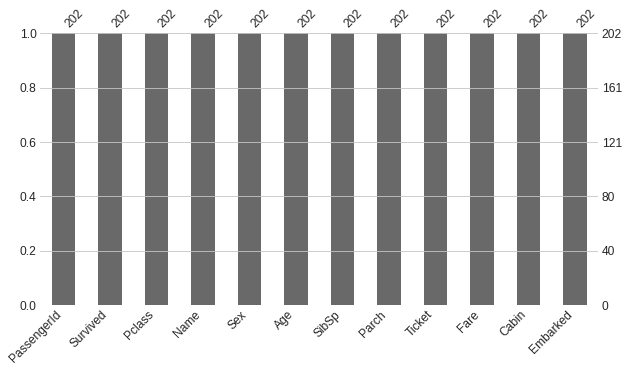

In [ ]:
msno.bar(train, figsize=(10,5), fontsize=12)

## Outlier Detection

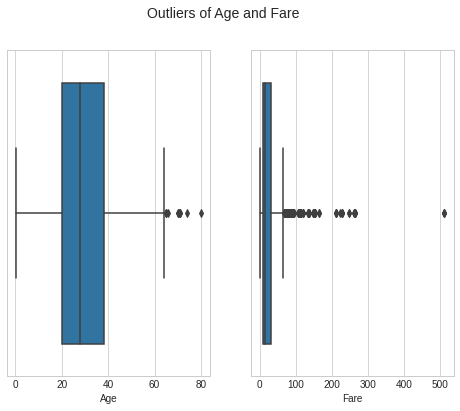

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8, 6))

plt.suptitle('Outliers of Age and Fare', fontsize =14)

ax1 = sns.boxplot(train['Age'], ax = axs[0])
ax2 = sns.boxplot(train['Fare'], ax = axs[1])

plt.show()

In [ ]:
#here we are detecting outliers :
def find_outliers_IQR(data, name):
   q1 = np.percentile(data, 25, interpolation = 'linear') 
   q3 = np.percentile(data, 75, interpolation = 'linear') 
   IQR=q3-q1
   lowerlim = q1 - 1.5 * IQR
   upperlim = q3 + 1.5 * IQR
   outliers = data[((data < lowerlim) | (data>upperlim))]
   print(f'Variable Names : {name}')
   print(f'Number of Outliers : {len(outliers)}')
   print(f'Lower Limit Values : {lowerlim}')
   print(f'Upper Limit Values : {upperlim}')

In [ ]:
find_outliers_IQR(train['Age'], 'Age')
print('\n')
find_outliers_IQR(train['Fare'], 'Fare')

Variable Names : Age
Number of Outliers : 0
Lower Limit Values : nan
Upper Limit Values : nan


Variable Names : Fare
Number of Outliers : 116
Lower Limit Values : -26.724
Upper Limit Values : 65.6344


#Correlations between Variables.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


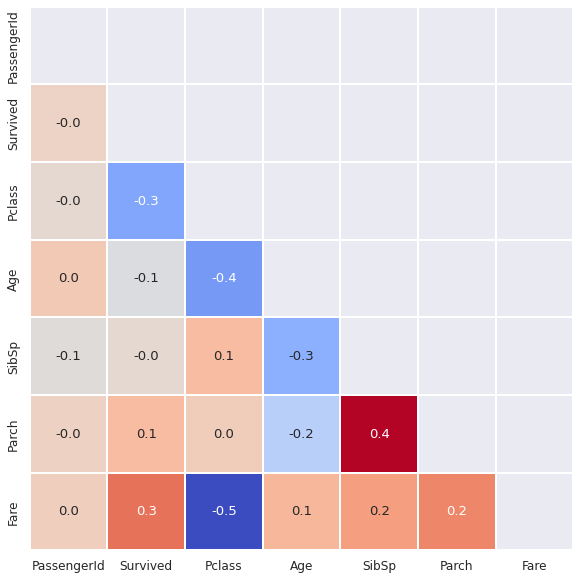

In [ ]:
sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.01f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

#**Exploring Each Feature Separately:**
  >1. Survived.
  >2. Name.
  >3. Ticket.
  >4. Cabin.
  >5. Age.
  >6. SibSp.
  >7. Parch.
  >8. Pclass.
  >9. Fare.
  >10. Sex.
  >11. Embarked.
  >12. PassengerId.

##**Exploring Survived Feature (Target Variable)**
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train.Survived.dtypes

dtype('int64')

In [ ]:
train.Survived.isnull().sum()

0

In [ ]:
train.groupby("Survived").aggregate("count")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [ ]:
train.groupby("Survived").aggregate("min")

In [ ]:
train.groupby("Survived").aggregate("max")

In [ ]:
train.groupby("Survived").aggregate("std")

In [ ]:
train.groupby("Survived").aggregate("mean")

In [ ]:
train.groupby("Survived").aggregate("median")

In [ ]:
train.Survived.agg(['count', 'mean', 'std', 'sum', 'max', 'min'])

count    891.000000
mean       0.383838
std        0.486592
sum      342.000000
max        1.000000
min        0.000000
Name: Survived, dtype: float64

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Evaluations of Survived Passengers Distributions')

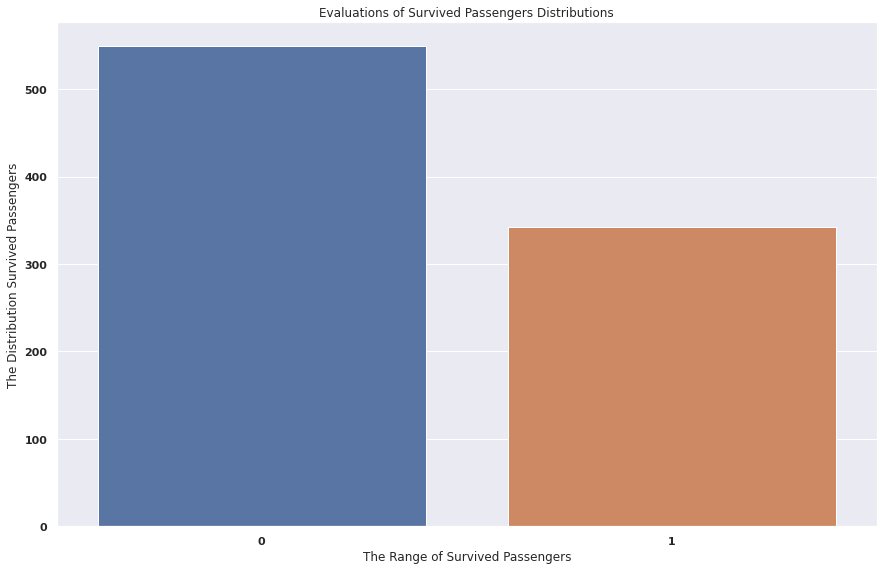

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Survived", data=train)
plt.xlabel('The Range of Survived Passengers')
plt.ylabel('The Distribution Survived Passengers')
plt.title('Evaluations of Survived Passengers Distributions')

Text(0.5, 1.0, 'Evaluations of Survived Passengers Distributions')

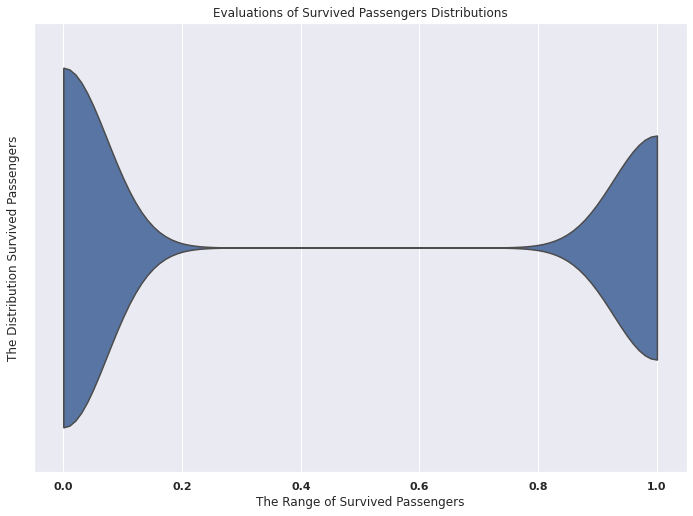

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="Survived", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Survived Passengers')
plt.ylabel('The Distribution Survived Passengers')
plt.title('Evaluations of Survived Passengers Distributions')

##**Exploring Name Feature (Predictor Variable)**
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
train.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [ ]:
train.Name.dtypes

dtype('O')

In [ ]:
train.Name.isnull().sum()

0

In [ ]:
train.Name.describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [ ]:
train["name_title"] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
train.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

##**Exploring Ticket Feature (Predictor Variable)**
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
train.Ticket.dtypes

dtype('O')

In [ ]:
train.Ticket.isnull().sum()

0

In [ ]:
train.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
train.Ticket.nunique()

681

In [ ]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [ ]:
train.numeric_ticket.unique()

array([0, 1])

In [ ]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [ ]:
train.ticket_letters.unique()

array(['a5', 'pc', 'stono2', 0, 'pp', 'ca', 'scparis', 'sca4', 'a4', 'sp',
       'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'fcc', 'swpp',
       'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle', 'sopp', 'fc',
       'sotono2', 'casoton'], dtype=object)

In [ ]:
pd.set_option("max_rows", None)
train.ticket_letters.value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc ='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc ='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


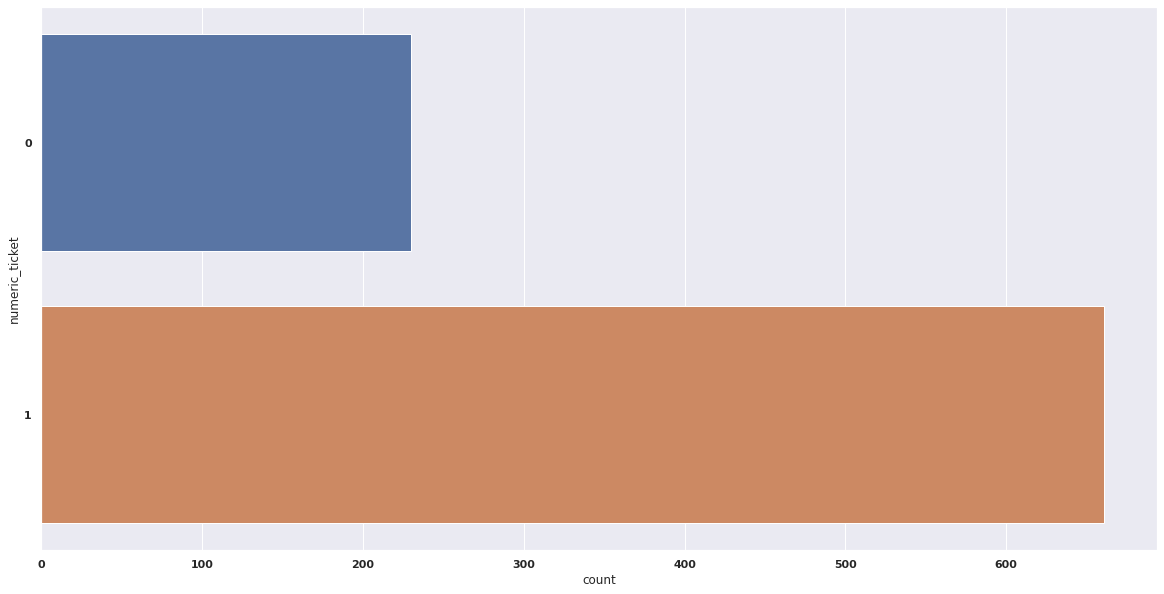

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(y='numeric_ticket', data=train);

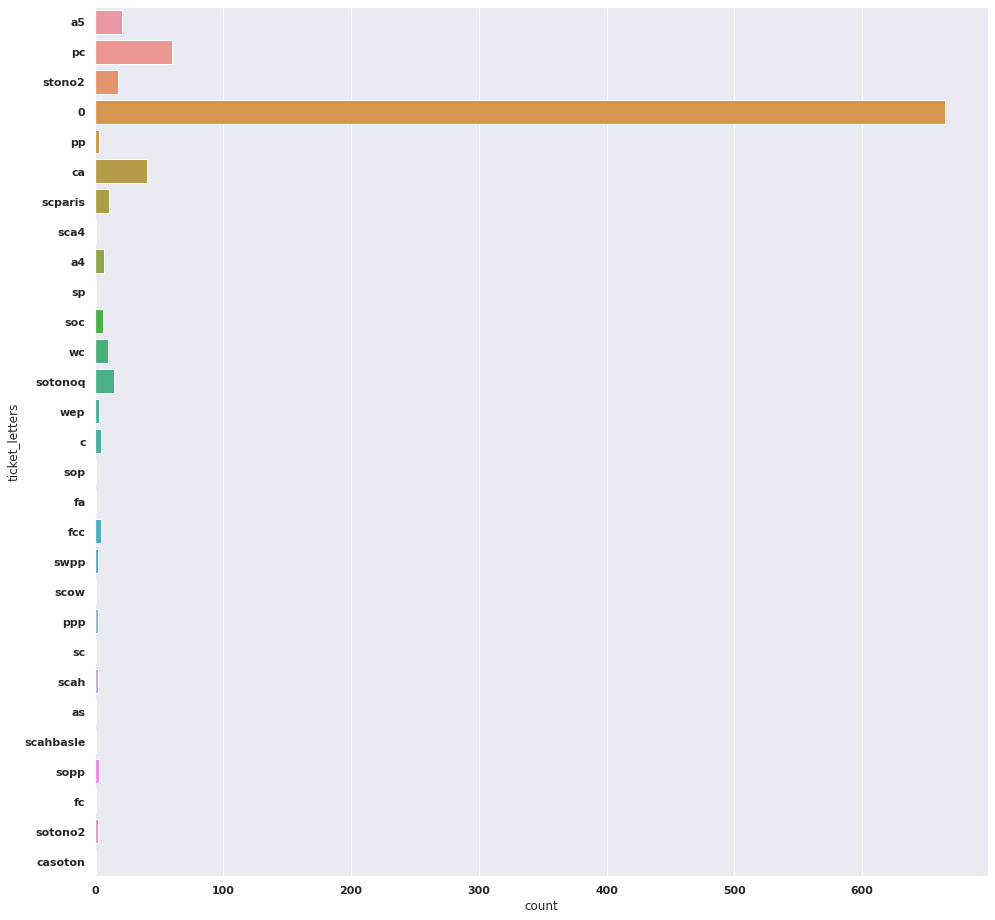

In [ ]:
fig = plt.figure(figsize=(16, 16))
sns.countplot(y='ticket_letters', data=train);

# Cabin Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0


In [ ]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [ ]:
train.Cabin.value_counts().head()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

In [ ]:
train.Cabin.dtypes

dtype('O')

In [ ]:
train.Cabin.isnull().sum()

687

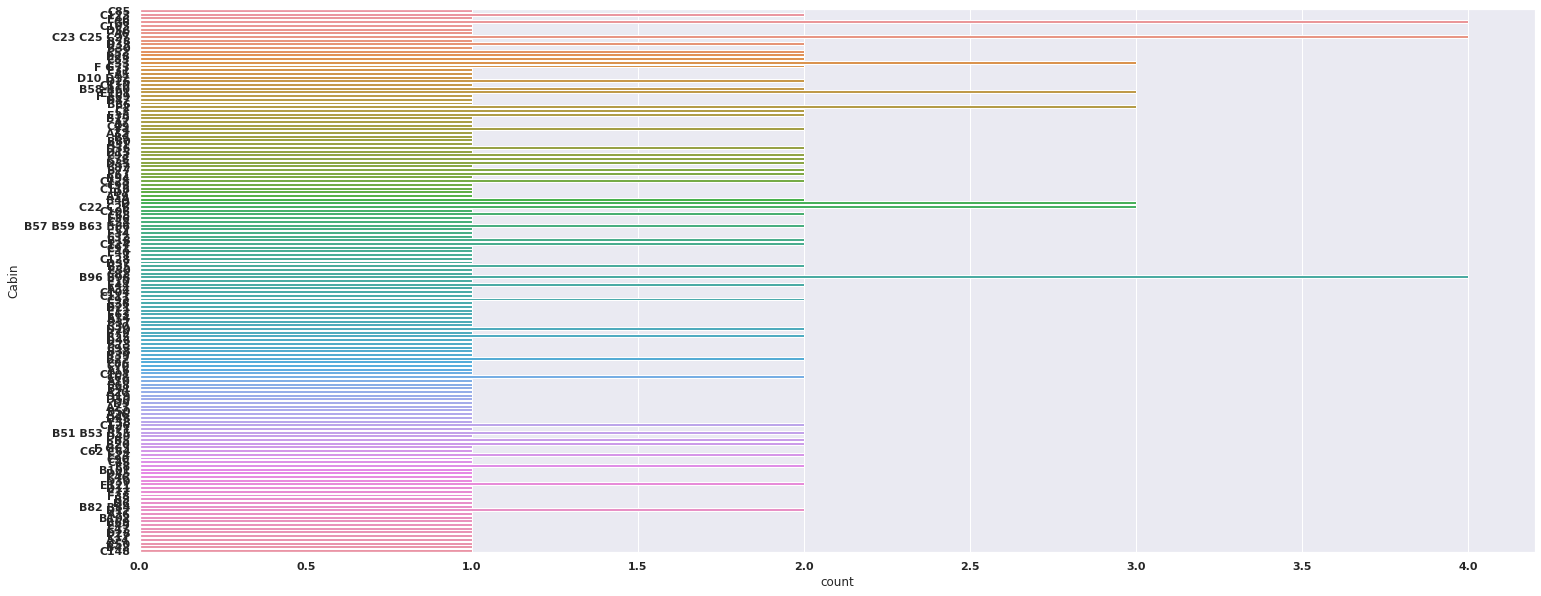

In [ ]:
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='Cabin', data=train);

**Splitting the Cabin feature into:**
> 1. Numeric = Cabin Multiple.
> 2. Letters = Cabin Adv.

In [ ]:
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [ ]:
train.cabin_multiple.head()

0    0
1    1
2    0
3    1
4    0
Name: cabin_multiple, dtype: int64

In [ ]:
train.cabin_adv.head()

0    n
1    C
2    n
3    C
4    n
Name: cabin_adv, dtype: object

In [ ]:
train.cabin_multiple.unique()

array([0, 1, 3, 2, 4])

In [ ]:
train.cabin_adv.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
train.cabin_multiple.dtypes

dtype('int64')

In [ ]:
train.cabin_adv.dtypes

dtype('O')

In [ ]:
train.cabin_multiple.describe()

count    891.000000
mean       0.267116
std        0.547134
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: cabin_multiple, dtype: float64

In [ ]:
train.cabin_adv.describe()

count     891
unique      9
top         n
freq      687
Name: cabin_adv, dtype: object

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64


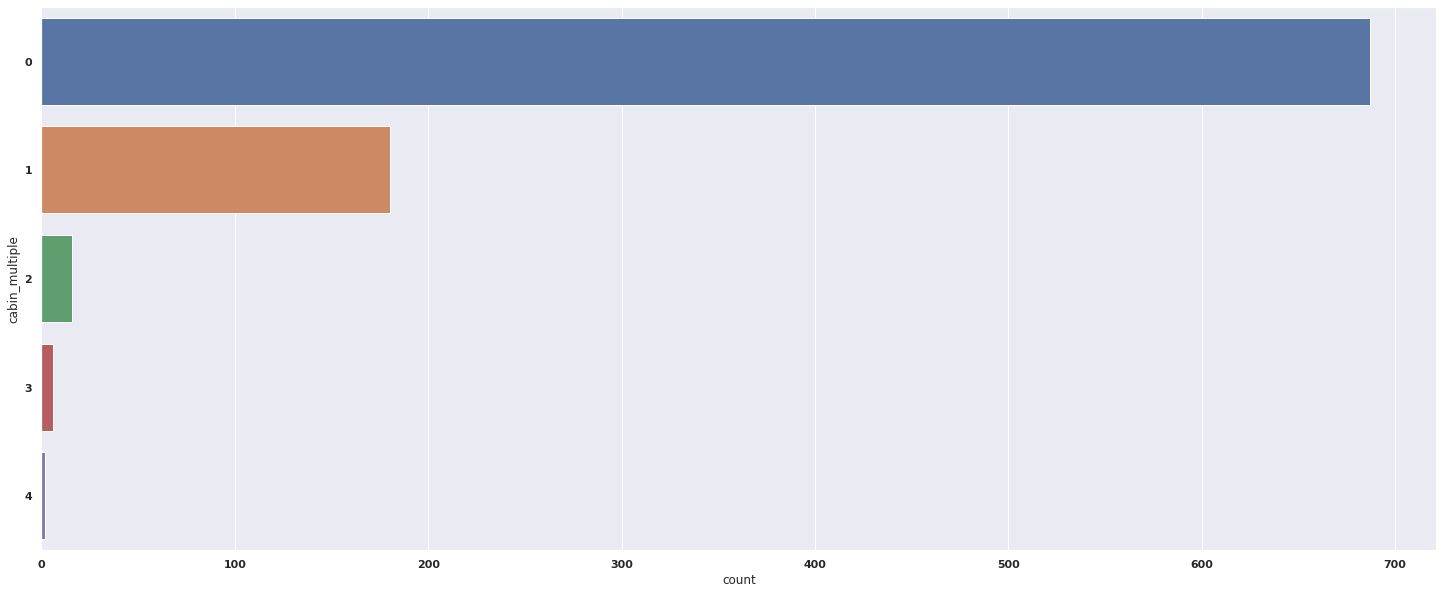

In [ ]:
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='cabin_multiple', data=train);
print(train.cabin_multiple.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


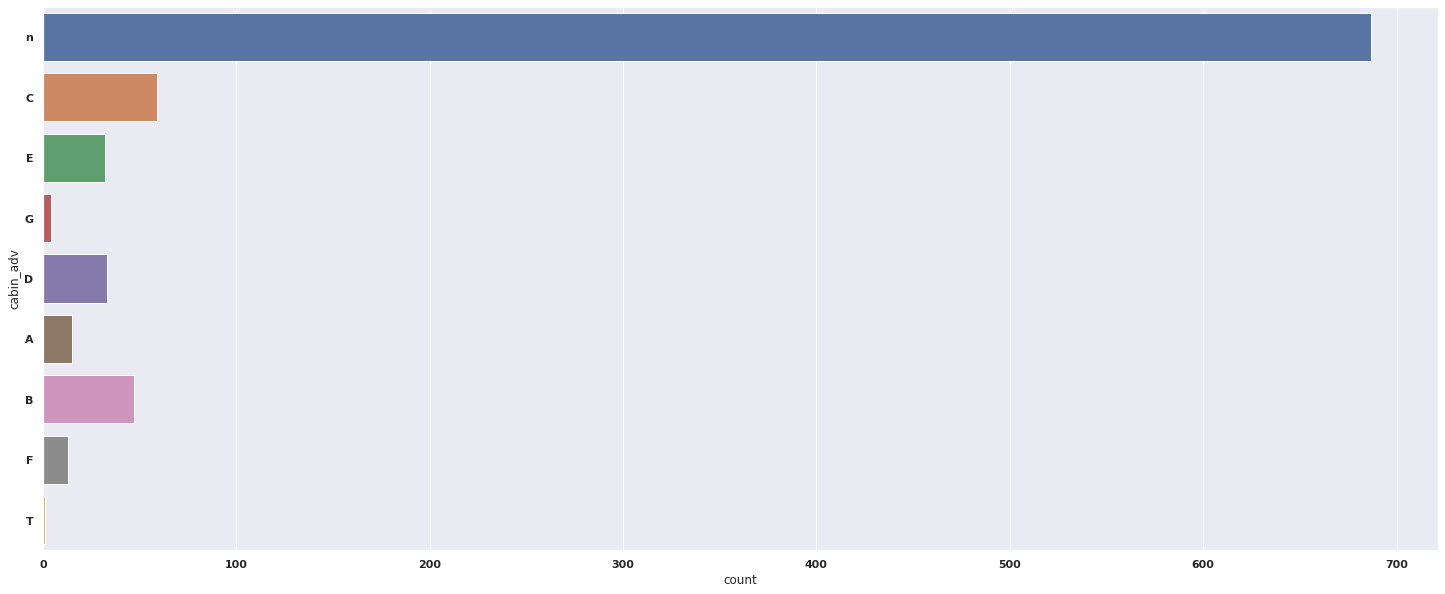

In [ ]:
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='cabin_adv', data=train);
print(train.cabin_adv.value_counts())

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_adv', values = 'Ticket', aggfunc ='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


### 1. Age Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train.Age.dtypes

dtype('float64')

In [ ]:
train.Age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

In [ ]:
train.Age.nunique()

88

In [ ]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
train["Age"] = train["Age"].astype(int)

In [ ]:
train["Age"].unique()

In [ ]:
train["Age"].value_counts().head()

In [ ]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Evaluations of Age Distributions')

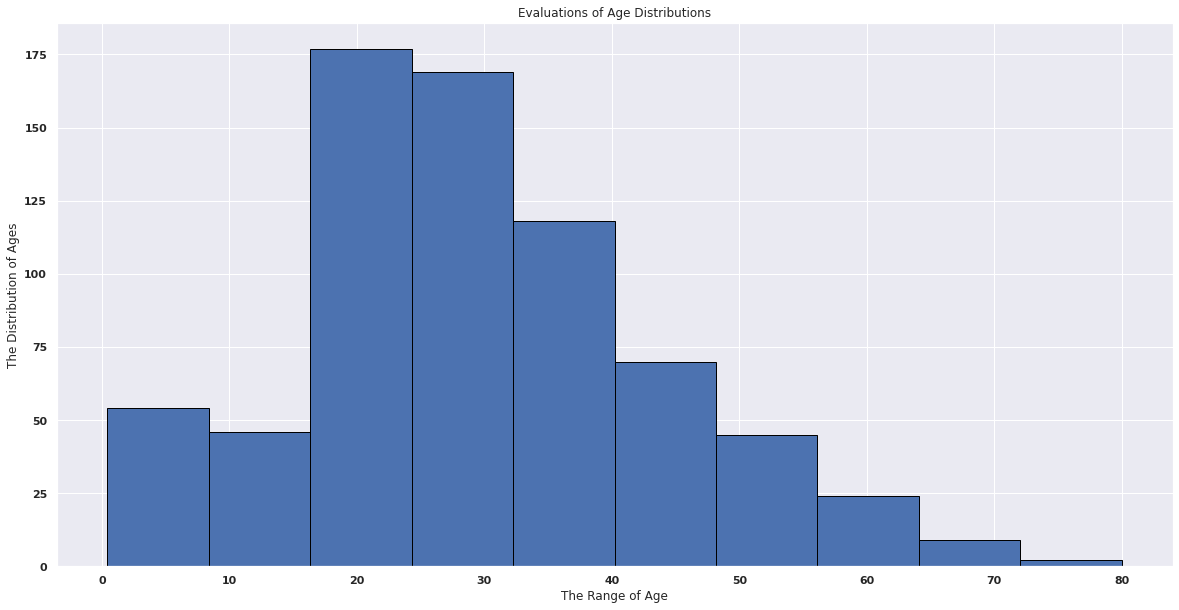

In [ ]:
train.Age.plot.hist(edgecolor = "black", figsize=(20,10))
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

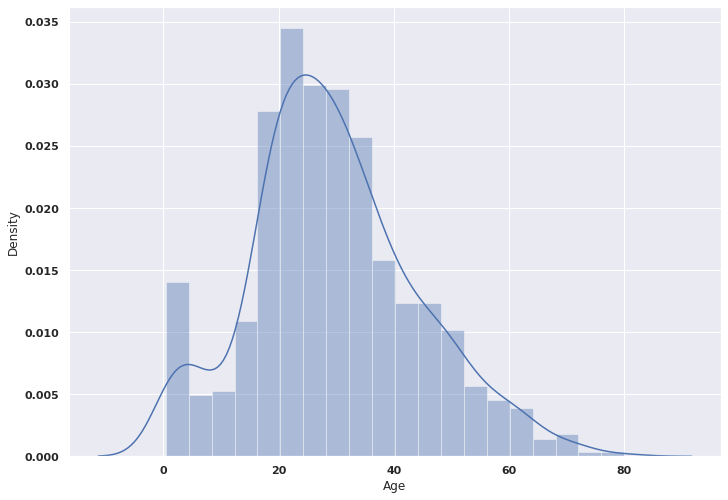

In [ ]:
sns.distplot(train.Age)

In [ ]:
#Frequency distribution of Ages.
ClassIntervals = ["0-20", "21-40", "41- 60", "61-80"]

FreqAge = pd.DataFrame(train["Age"], columns = ["Age"])
FreqAge.index.name = 'Frequency'
FreqAge.head()

In [ ]:
freq_table = pd.crosstab(index = "Frequency", columns = FreqAge["Age"])
freq_table

freq_table = (freq_table / len(train.Age)) * 100
freq_table

In [ ]:
FreqAge["Classes"] = pd.cut(FreqAge.Age, bins = 5)
FreqAge.head()

In [ ]:
freq_table = pd.crosstab(index = "Frequencies", columns = FreqAge["Classes"])
freq_table

Classes,"(0.841, 16.736]","(16.736, 32.552]","(32.552, 48.368]","(48.368, 64.184]","(64.184, 80.0]"
row_0,,,,,
Frequencies,16,81,64,36,5


In [ ]:
df = freq_table.T
df

row_0,Frequencies
Classes,
"(0.841, 16.736]",16
"(16.736, 32.552]",81
"(32.552, 48.368]",64
"(48.368, 64.184]",36
"(64.184, 80.0]",5


In [ ]:
df1 = df.rename(columns = {0: "Frequencies"})
df1

row_0,Frequencies
Classes,
"(0.841, 16.736]",16
"(16.736, 32.552]",81
"(32.552, 48.368]",64
"(48.368, 64.184]",36
"(64.184, 80.0]",5


In [ ]:
df1["RelativeFrequencies"] = df1["Frequencies"] / df1["Frequencies"].sum() * 100
df1

row_0,Frequencies,RelativeFrequencies
Classes,,
"(0.841, 16.736]",16,7.920792
"(16.736, 32.552]",81,40.099010
"(32.552, 48.368]",64,31.683168
"(48.368, 64.184]",36,17.821782
"(64.184, 80.0]",5,2.475248


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n


In [ ]:
train["AgeBins"] = pd.cut(train["Age"], 10)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]"


##**Exploring SibSp Feature (Predictor Variable)**
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.SibSp.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [ ]:
train.SibSp.dtypes

dtype('int64')

In [ ]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
train.SibSp.shape

(891,)

In [ ]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [ ]:
train.groupby('SibSp').aggregate(['count', 'mean', 'std', 'sum', 'max', 'min']).head()

PassengerId                                          Survived            \
            count        mean         std     sum  max min    count      mean   
SibSp                                                                           
0             608  455.370066  255.992322  276865  891   3      608  0.345395   
1             209  439.727273  255.953585   91903  889   1      209  0.535885   
2              28  412.428571  231.778699   11548  861  39       28  0.464286   
3              16  321.562500  274.489094    5145  820   8       16  0.250000   
4              18  381.611111  298.283351    6869  851  17       18  0.166667   

                      ... numeric_ticket              cabin_multiple  \
            std  sum  ...            std  sum max min          count   
SibSp                 ...                                              
0      0.475888  210  ...       0.434315  455   1   0            608   
1      0.499908  112  ...       0.443951  153   1   0            209   
2      0.507875   13  ...       0.475595   19   1   0             28   
3      0.447214    4  ...       0.000000   16   1   1             16   
4      0.383482    3  ...       0.000000   18   1   1             18   

                                        
           mean       std  sum max min  
SibSp                                   
0      0.225329  0.466559  137   3   0  
1      0.382775  0.593952   80   3   0  
2      0.428571  1.069045   12   4   0  
3      0.562500  1.209339    9   3   0  
4      0.000000  0.000000    0   0   0  

[5 rows x 48 columns]

In [ ]:
pd.pivot_table(train, index = 'Survived', values = ['SibSp'])

,SibSp
Survived,
0,0.553734
1,0.473684


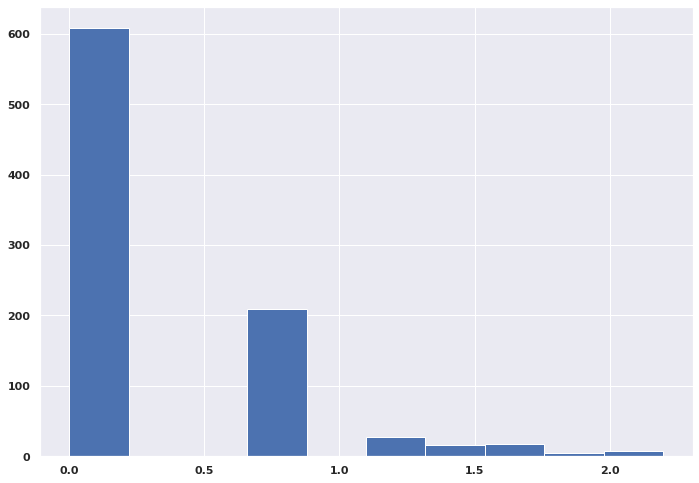

In [ ]:
train['norm_sibsp'] = np.log(train.SibSp+1)
train['norm_sibsp'].hist()

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]",0.693147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]",0.693147
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]",0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]",0.693147
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]",0.000000


In [ ]:
train.SibSp.plot.hist(edgecolor = "black", figsize=(15,8))
plt.xlabel('The Range of Siblings and Spouses')
plt.ylabel('The Distribution of Siblings and Spouses')
plt.title('Evaluations of SibSp Distributions')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="SibSp", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Siblings and Spouses')
plt.ylabel('The Distribution of Siblings and Spouses')
plt.title('Evaluations of SibSp Distributions')

Text(0.5, 1.0, 'Evaluations of SibSp Distributions')

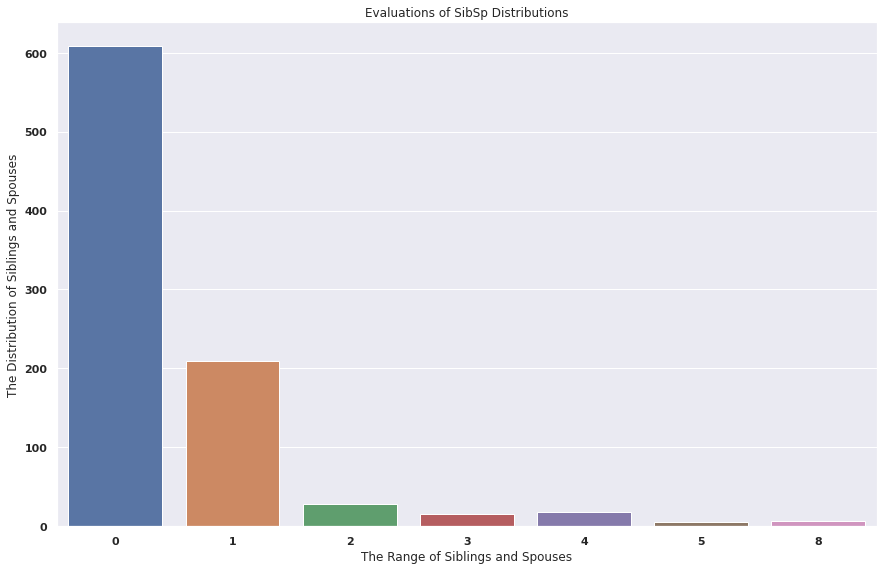

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="SibSp", data=train)
plt.xlabel('The Range of Siblings and Spouses')
plt.ylabel('The Distribution of Siblings and Spouses')
plt.title('Evaluations of SibSp Distributions')

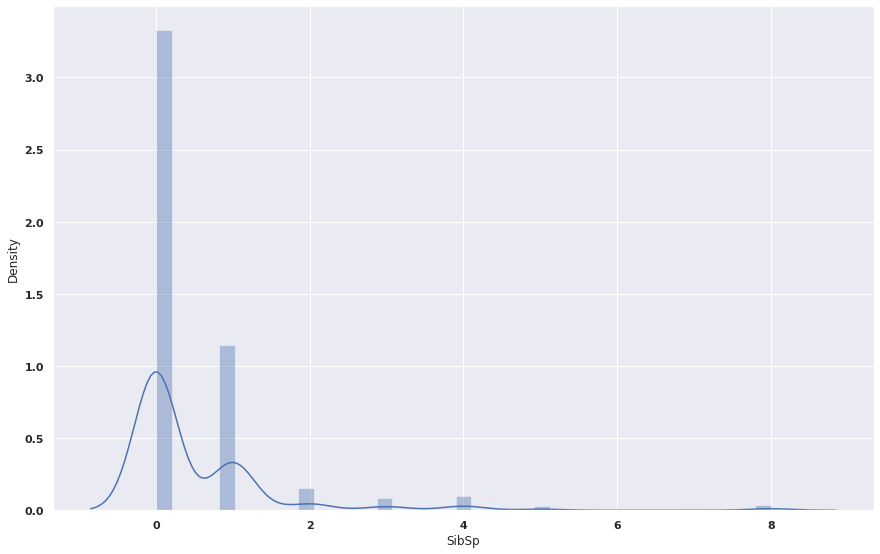

In [ ]:
sns.distplot(train.SibSp)

##**Exploring Parch Feature (Predictor Variable)**
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]",0.693147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]",0.693147
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]",0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]",0.693147
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]",0.000000


In [ ]:
train.Parch.head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

In [ ]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train.Parch.dtypes

dtype('int64')

In [ ]:
train.Parch.isnull().sum()

0

In [ ]:
train.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Parch', values = 'Ticket' ,aggfunc ='count')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


Text(0.5, 1.0, 'Evaluations of Parents and Children Distributions')

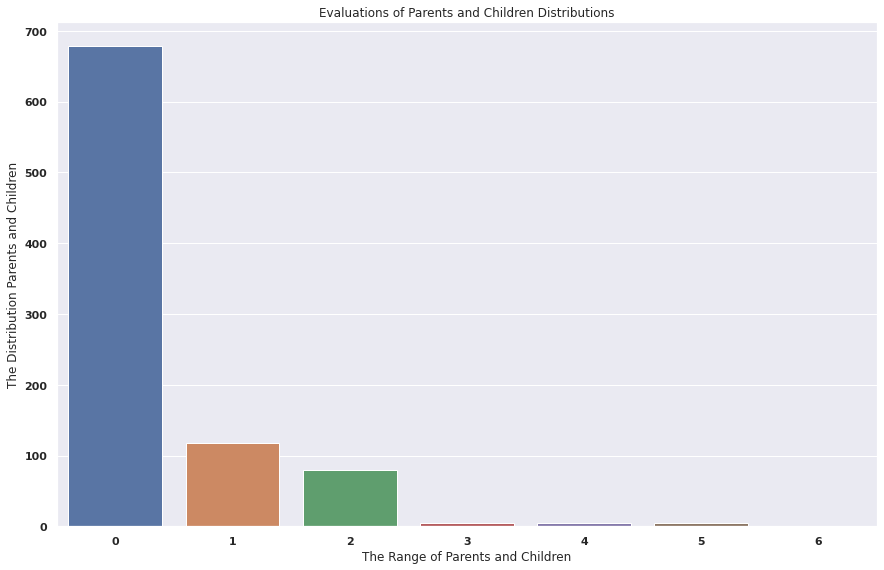

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Parch", data=train)
plt.xlabel('The Range of Parents and Children')
plt.ylabel('The Distribution Parents and Children')
plt.title('Evaluations of Parents and Children Distributions')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="Parch", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Parents and Children')
plt.ylabel('The Distribution Parents and Children')
plt.title('Evaluations of Parents and Children Distributions')

# Pclass Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]",0.693147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]",0.693147
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]",0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]",0.693147
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]",0.000000


In [ ]:
train.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [ ]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train.Pclass.dtypes

dtype('int64')

In [ ]:
train.Pclass.isnull().sum()

0

In [ ]:
train.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [ ]:
train.groupby("Pclass").aggregate("count")

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
Pclass,,,,,,,,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214,216,216,216,216,216,186,216
2,184,184,184,184,173,184,184,184,184,16,184,184,184,184,184,184,173,184
3,491,491,491,491,355,491,491,491,491,12,491,491,491,491,491,491,355,491


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Text(0.5, 1.0, 'Evaluations of Ticket Classes Distributions')

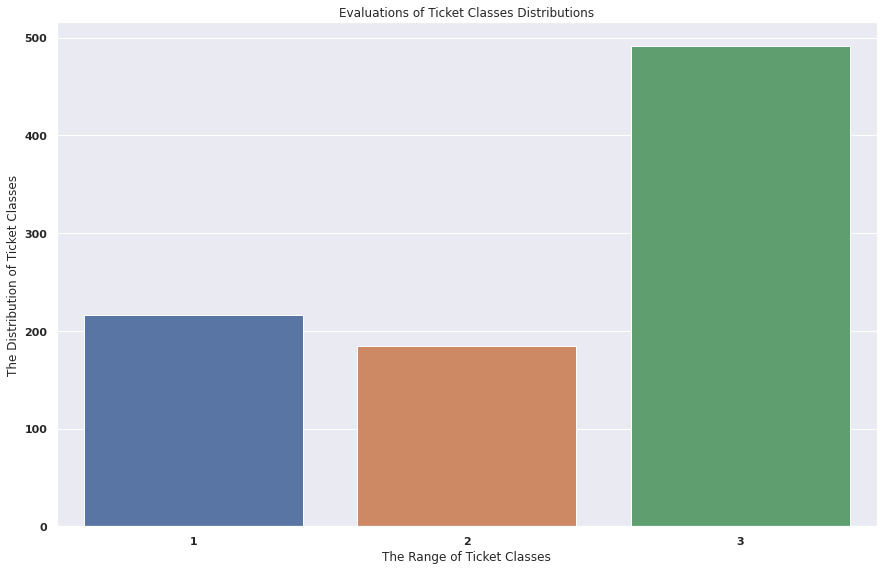

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Pclass", data=train)
plt.xlabel('The Range of Ticket Classes')
plt.ylabel('The Distribution of Ticket Classes')
plt.title('Evaluations of Ticket Classes Distributions')

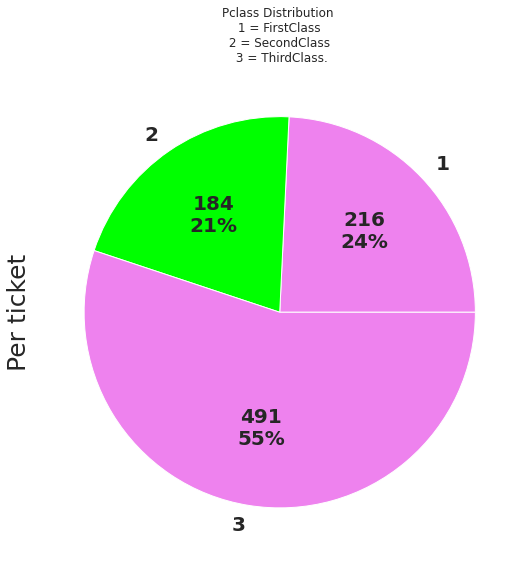

In [ ]:
def label_function(val):
    return f'{val / 100 * len(train.Pclass):.0f}\n{val:.0f}%'



fig, ax = plt.subplots(figsize=(15, 8))

train.groupby('Pclass').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], ax = ax)
plt.title('Pclass Distribution \n 1 = FirstClass \n 2 = SecondClass \n 3 = ThirdClass.')
ax.set_ylabel('Per ticket', size=25)
plt.tight_layout()
plt.show()

##**Exploring Fare Feature (Predictor Variable)**
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]",0.693147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]",0.693147
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]",0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]",0.693147
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]",0.000000


In [ ]:
train.Fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [ ]:
train.Fare.value_counts().head()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64

In [ ]:
train.Fare.dtypes

dtype('float64')

In [ ]:
train.Fare.isnull().sum()

0

In [ ]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Evaluations of Passenger Fares-Distributions')

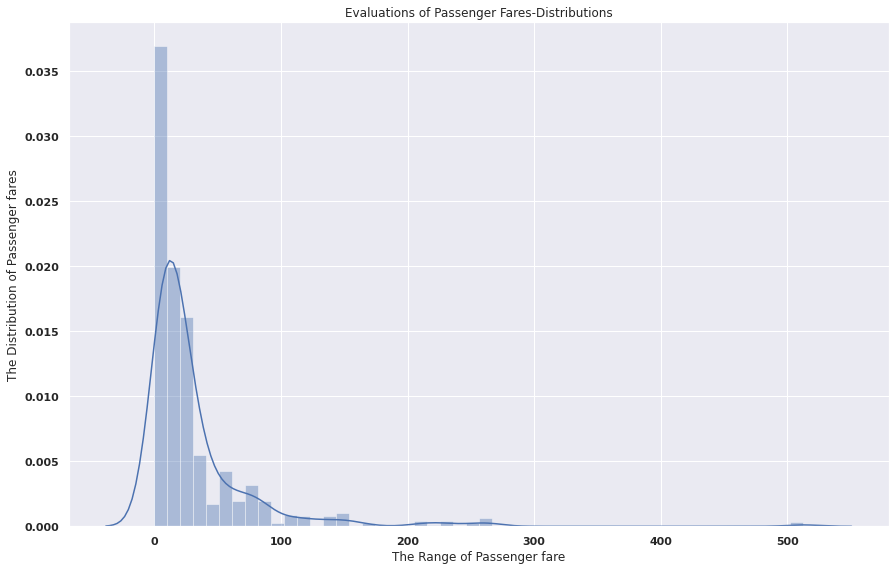

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.distplot(train.Fare)
plt.xlabel('The Range of Passenger fare')
plt.ylabel('The Distribution of Passenger fares')
plt.title('Evaluations of Passenger Fares-Distributions')

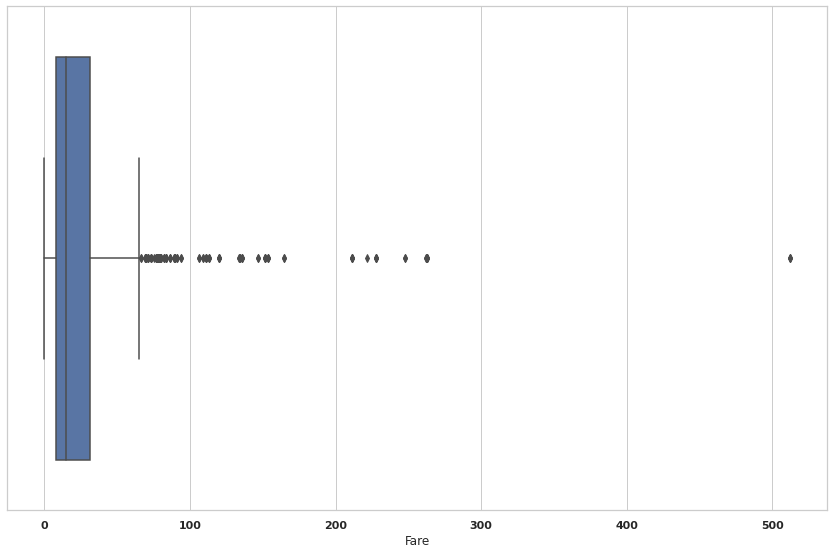

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(train.Fare)

**Because there are lots of outliers in our Passengers' fares, we are going to rescale the data using Log transformation in order to conform our data to normality.**

In [ ]:
train["Fare"] = [np.log(x) for x in train["Fare"]]
train.Fare.head()

In [ ]:
#Removing NaN values.
train.Fare.fillna(train.Fare.mean(), inplace = True)
# Removing Infinities.
train.Fare.replace([np.inf, -np.inf], train.Fare.mean(), inplace = True)

In [ ]:
# Removing Infinities.
train.Fare.replace([np.inf, -np.inf], train.Fare.mean(), inplace = True)

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(train.Fare)

In [ ]:
train.Fare.replace([np.inf, -np.inf], train.Fare.mean(), inplace = True)

In [ ]:
train["Fare"] = [np.log(x) for x in train["Fare"]]

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(train.Fare)

In [ ]:
#Removing NaN values.
train.Fare.fillna(train.Fare.mean(), inplace = True)
# Removing Infinities.
train.Fare.replace([np.inf, -np.inf], train.Fare.mean(), inplace = True)

In [ ]:
train["FareBins"] = pd.cut(train.Fare, bins = 5)
train.head()

#  Sex Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train.Sex.dtypes

dtype('O')

In [ ]:
train.Sex.isnull().sum()

0

In [ ]:
train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [ ]:
#Try to decompose it into Males and Females.
train["Sex"] = np.where(train['Sex'] == 'female',1 ,0)

In [ ]:
train.Sex.nunique()

2

In [ ]:
pd.pivot_table(train,index='Survived',columns='Sex', values = 'Ticket', aggfunc='count')

Sex,0,1
Survived,,
0,468,81
1,109,233


Text(0.5, 1.0, 'Evaluations of Gender Distributions')

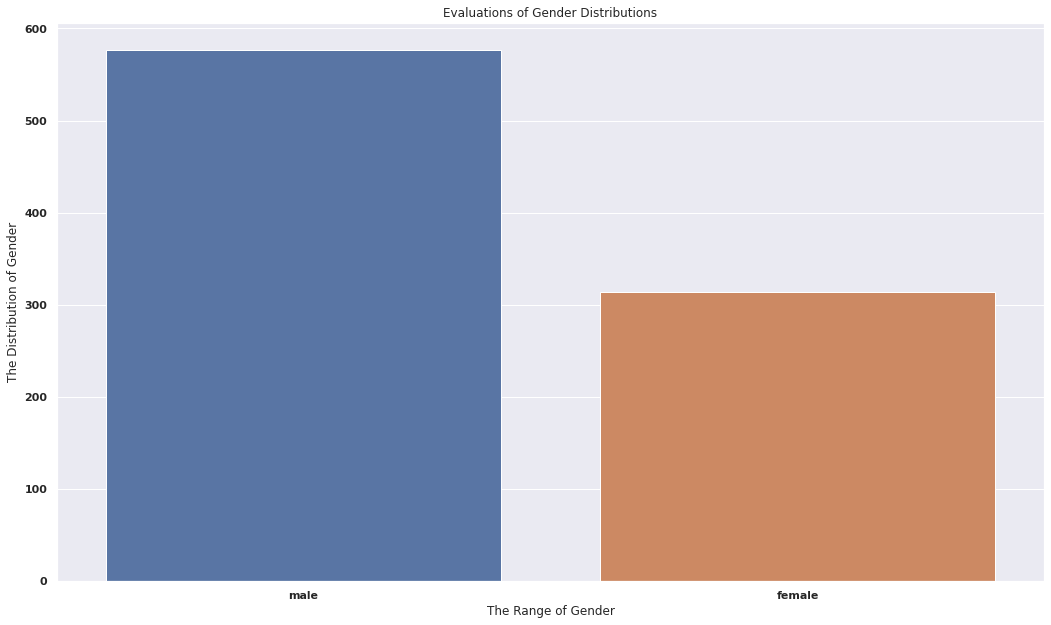

In [ ]:
sns.set(rc={'figure.figsize':(17.7,10.27)})
sns.countplot(x="Sex", data=train)
plt.xlabel('The Range of Gender')
plt.ylabel('The Distribution of Gender')
plt.title('Evaluations of Gender Distributions')

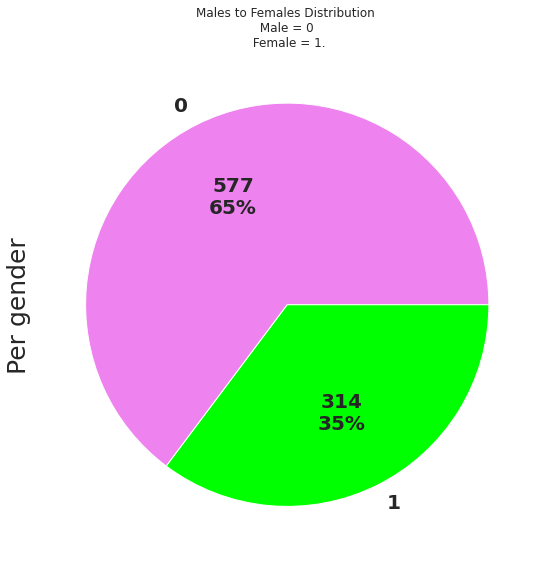

In [ ]:
def label_function(val):
    return f'{val / 100 * len(train.Sex):.0f}\n{val:.0f}%'



fig, ax = plt.subplots(figsize=(15, 8))

train.groupby('Sex').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], ax = ax)
plt.title('Males to Females Distribution \n Male = 0 \n Female = 1.')
ax.set_ylabel('Per gender', size=25)
plt.tight_layout()
plt.show()

##**Exploring Embarked Feature (Predictor Variable)**
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]",0.693147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]",0.693147
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]",0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]",0.693147
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]",0.000000


In [ ]:
train.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train.Embarked.dtypes

dtype('O')

In [ ]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train.Embarked.value_counts()

In [ ]:
train.Embarked.isnull().sum()

In [ ]:
train.Embarked.describe()

In [ ]:
pd.pivot_table(train,index='Survived',columns='Embarked', values = 'Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
EmbarkedNull = train.Embarked.isnull()
EmbarkedNull.head()

In [ ]:
EmbarkedNullSum = EmbarkedNull.sum()
EmbarkedNullSum

In [ ]:
EmbarkedTotalLength = len(train.Embarked)
EmbarkedTotalLength

In [ ]:
EmbarkedNullMean = (EmbarkedNullSum / EmbarkedTotalLength) * 100
EmbarkedNullMean

In [ ]:
train["Embarked"].fillna(EmbarkedNullMean, inplace = True)

In [ ]:
train.Embarked.isnull().sum()

# Pclass Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]",0.693147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]",0.693147
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]",0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]",0.693147
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]",0.000000


In [ ]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train.Pclass.dtypes

dtype('int64')

In [ ]:
train.Pclass.isnull().sum()

0

In [ ]:
train.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [ ]:
pd.pivot_table(train,index='Survived',columns='Pclass', values = 'Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Text(0.5, 1.0, 'Evaluations of Classes of Tickets Distributions')

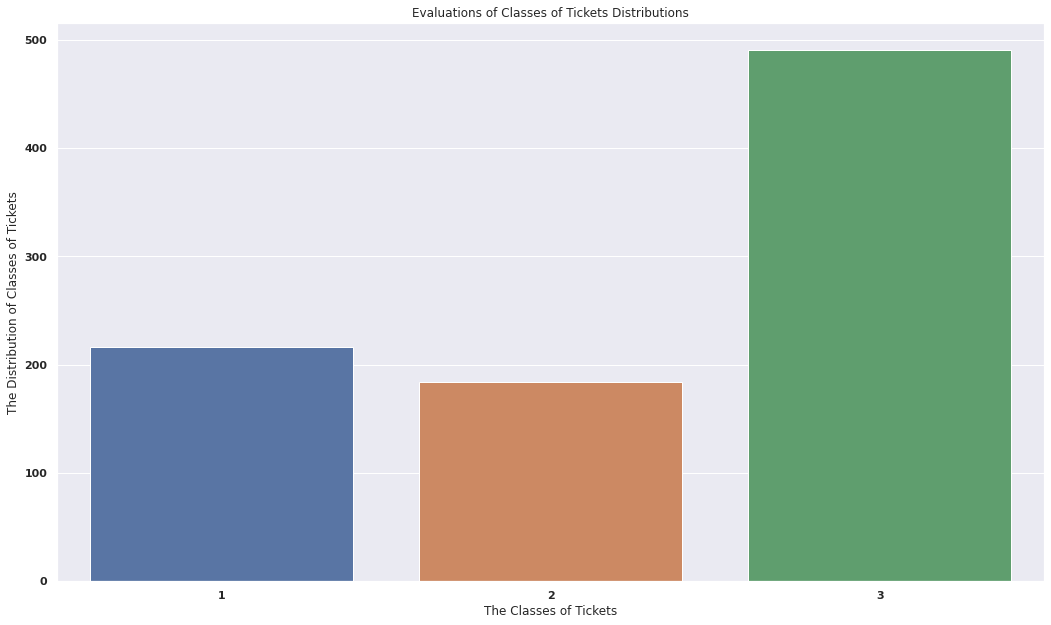

In [ ]:
sns.countplot(train.Pclass)
plt.xlabel('The Classes of Tickets')
plt.ylabel('The Distribution of Classes of Tickets')
plt.title('Evaluations of Classes of Tickets Distributions')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,AgeBins,norm_sibsp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n,"(16.336, 24.294]",0.693147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C,"(32.252, 40.21]",0.693147
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n,"(24.294, 32.252]",0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C,"(32.252, 40.21]",0.693147
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n,"(32.252, 40.21]",0.000000


## Feature Encoding

In [ ]:
df_bin = pd.DataFrame()
df_bin["Survived"] = train["Survived"]
df_bin["Pclass"] = train["Pclass"]
df_bin["Sex"] = train["Sex"]
df_bin["SibSp"] = train["SibSp"]
df_bin["Parch"] = train["Parch"]
df_bin["FareBins"] = train["FareBins"]
df_bin["Embarked"] = train["Embarked"]
df_bin.head()

In [ ]:
df_con = pd.DataFrame()
df_con["Survived"] = train["Survived"]
df_con["Pclass"] = train["Pclass"]
df_con["Sex"] = train["Sex"]
df_con["SibSp"] = train["SibSp"]
df_con["Parch"] = train["Parch"]
df_con["Fare"] = train["Fare"]
df_con["Embarked"] = train["Embarked"]
df_con.head()

In [ ]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,...,"Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df_con.head()

,Survived,SibSp,Parch,Fare,Sex,Embarked,Pclass
0,0,1,0,7.2500,male,S,3
1,1,1,0,71.2833,female,C,1
2,1,0,0,7.9250,female,S,3
3,1,1,0,53.1000,female,S,1
4,0,0,0,8.0500,male,S,3


In [ ]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [ ]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
df_con_enc.columns

In [ ]:
df_con_enc = df_con_enc.drop("embarked_0.22446689113355783", axis = "columns")

In [ ]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

In [ ]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [ ]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [ ]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [ ]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
y_train.shape

(889,)

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:02.115960


In [ ]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.58
Accuracy CV 10-Fold: 77.39
Running Time: 0:00:00.140031


In [ ]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.083841


In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.74
Accuracy CV 10-Fold: 76.49
Running Time: 0:00:00.402225


In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 76.04
Accuracy CV 10-Fold: 73.12
Running Time: 0:00:00.120354


In [ ]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.54
Running Time: 0:00:00.113976


In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:01.282331


In [ ]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 54.5ms	remaining: 54.4s
1:	learn: 0.6809444	total: 62ms	remaining: 30.9s
2:	learn: 0.6751692	total: 74.7ms	remaining: 24.8s
3:	learn: 0.6689060	total: 84.2ms	remaining: 21s
4:	learn: 0.6632144	total: 91.7ms	remaining: 18.2s
5:	learn: 0.6576488	total: 98.8ms	remaining: 16.4s
6:	learn: 0.6544441	total: 105ms	remaining: 14.8s
7:	learn: 0.6490635	total: 112ms	remaining: 13.9s
8:	learn: 0.6443241	total: 119ms	remaining: 13.1s
9:	learn: 0.6395935	total: 132ms	remaining: 13.1s
10:	learn: 0.6345186	total: 136ms	remaining: 12.3s
11:	learn: 0.6305316	total: 144ms	remaining: 11.9s
12:	learn: 0.6275610	total: 151ms	remaining: 11.4s
13:	learn: 0.6225020	total: 158ms	remaining: 11.1s
14:	learn: 0.6179503	total: 167ms	remaining: 10.9s
15:	learn: 0.6140480	total: 173ms	remaining: 10.6s
16:	learn: 0.6100034	total: 179ms	remaining: 10.3s
17:	learn: 0.6049646	total: 186ms	remaining: 10.2s
18:	learn: 0.6025760	total: 198ms	remaining: 10.2s
19:	learn

In [ ]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
24:	learn: 0.4893301	test: 0.4638872	best: 0.4638872 (24)	total: 85.8ms	remaining: 3.35s
25:	learn: 0.4846609	test: 0.4581783	best: 0.4581783 (25)	total: 89.9ms	remaining: 3.37s
26:	learn: 0.4812979	test: 0.4546720	best: 0.4546720 (26)	total: 116ms	remaining: 4.19s
27:	learn: 0.4773794	test: 0.4509130	best: 0.4509130 (27)	total: 191ms	remaining: 6.62s
28:	learn: 0.4759959	test: 0.4490016	best: 0.4490016 (28)	total: 241ms	remaining: 8.08s
29:	learn: 0.4726830	test: 0.4445672	best: 0.4445672 (29)	total: 285ms	remaining: 9.23s
30:	learn: 0.4686808	test: 0.4400542	best: 0.4400542 (30)	total: 290ms	remaining: 9.07s
31:	learn: 0.4656687	test: 0.4373876	best: 0.4373876 (31)	total: 295ms	remaining: 8.93s
32:	learn: 0.4629759	test: 0.4342703	best: 0.4342703 (32)	total: 301ms	remaining: 8.81s
33:	learn: 0.4619416	test: 0.4328279	best: 0.4328279 (33)	total: 309ms	remaining: 8.77s
34:	learn: 0.4610411	test: 0.4314925	best: 0.4314925 (34)	total: 31

In [ ]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:01:22.037053


## Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.58
1,Logistic Regression,79.98
4,Linear SVC,78.74
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,76.04


In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.54
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,77.39
4,Linear SVC,76.49
3,Stochastic Gradient Decent,73.12


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

## Feature Importance
Which features of the best model were most important for making predictions?

In [ ]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


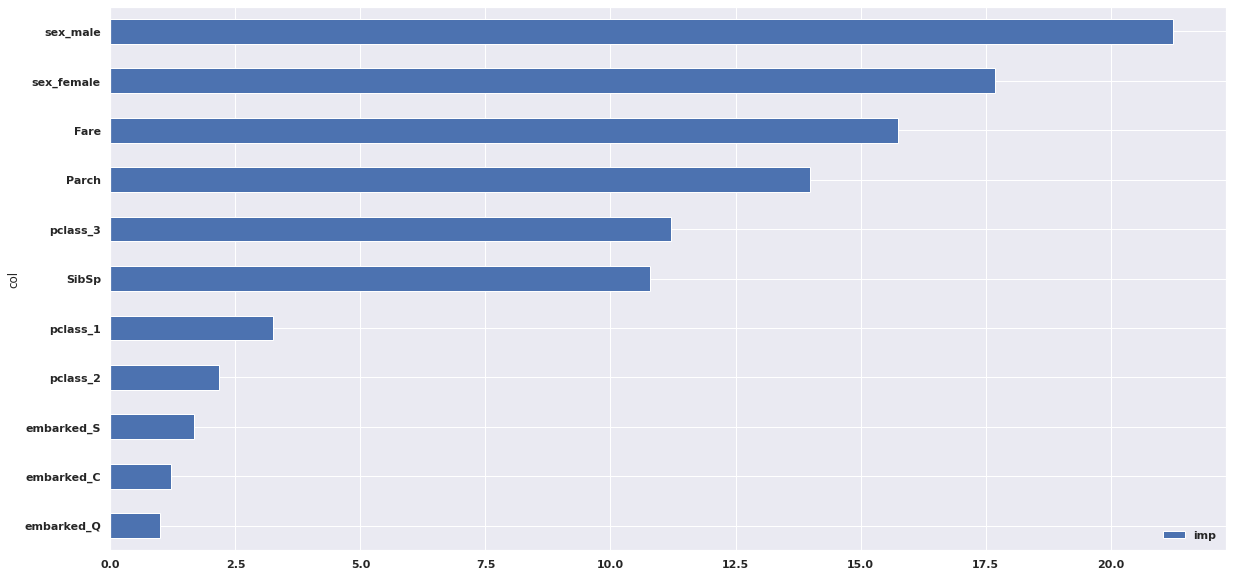

In [ ]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

**Challenge:** What are some ways to visualise precision and recall? 
*Hint:* You may want to look into what a confusion matrix is, you can find much more information in this blog post: [Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `test` dateframe, encode them and make a prediciton with our model.

In [ ]:
# We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [ ]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [ ]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [ ]:
test.rename(columns = {'sex_female':'sex_1', 'sex_male':'sex_0'}, inplace = True)
test.head()

In [ ]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [ ]:
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [ ]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [ ]:
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [ ]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [ ]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [ ]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
from google.colab import files
uploaded = files.download("../catboost_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>